In [ ]:
!pip install -U -q PyDrive

In [ ]:
import sqlite3
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
!mkdir data

In [ ]:
file_id = '1KiOvhsdjJqaUCLJa5adZXEtQ_72s8Eb6'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data/checking-logs.sqlite')

In [ ]:
conn = sqlite3.connect('data/checking-logs.sqlite')

In [ ]:
df = pd.io.sql.read_sql(
    "select uid, datetime from pageviews where uid like 'user_%'",
    conn, parse_dates=['datetime']
    )

In [ ]:
df.head()

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144


In [ ]:
df_1 = df['datetime'].dt.floor('d').value_counts()
df_1 = df_1.rename_axis('date')
df_1 = df_1.reset_index(name='views')

In [ ]:
df_1.head()

,date,views
0,2020-05-11,200
1,2020-05-14,187
2,2020-05-10,110
3,2020-05-13,102
4,2020-05-12,85


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    33 non-null     datetime64[ns]
 1   views   33 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 656.0 bytes


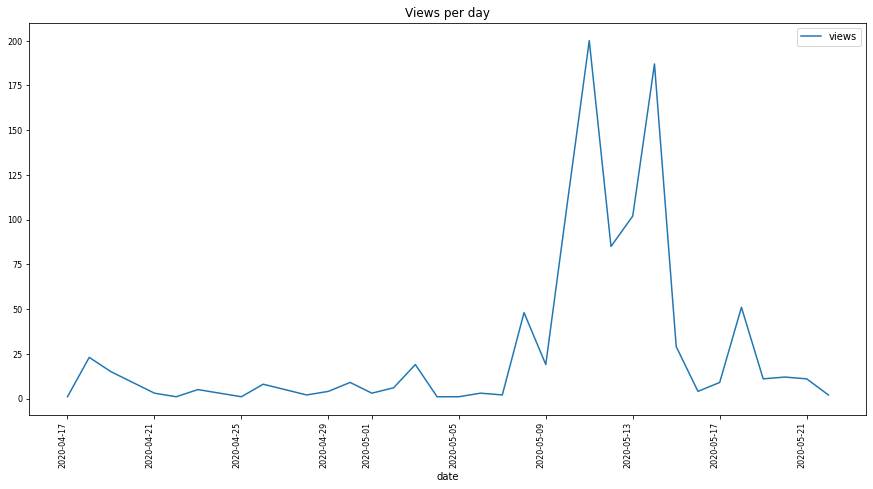

In [ ]:
df_1.plot(x='date', y='views', figsize=(15, 8),
          title='Views per day', rot=90, fontsize=8)

In [ ]:
conn.close()